In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [ ]:
# loadind the stroke Prediction dataset
# replace 'stroke_data.csv' with actual file path of your dataset
stroke_data = pd.read_csv('/content/healthcare-dataset-stroke-data.csv')

In [ ]:
# preprocessing the data (using 'id' column and handling missing values)
stroke_data = stroke_data.drop('id',axis=1)
stroke_data = stroke_data.dropna()


In [ ]:
# convert categorical variables to one-hot encoding
stroke_data = pd.get_dummies(stroke_data, columns = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'])

# Extract features and labels
x = stroke_data.drop('stroke', axis = 1).values
y = stroke_data['stroke'].values.reshape(-1,1)

In [ ]:
#normalize the data
scaler = StandardScaler()
x = scaler.fit_transform(x)

#split the data to training and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 42)


In [ ]:
# defining our neural network
class NeuralNetwork:
  def __init__(self, input_size, hidden_size, output_size):
    self.input_size = input_size
    self.hidden_size = hidden_size
    self.output_size = output_size

    #initializing weights and bias
    self.weights_input_hidden = np.random.randn(self.input_size,self.hidden_size)
    self.bias_hidden = np.zeros([1,self.hidden_size])
    self.weights_hidden_output = np.random.randn(self.hidden_size,self.output_size)
    self.bias_output = np.zeros([1,self.output_size])
  def sigmoid(self, x):
    return 1 / ( 1 + np.exp(-x))
  def sigmoid_derivative(self, x):
    return x * ( 1 - x )
  def forward(self, x):
    #Input hidden layer
    self.hidden_input = np.dot(x, self.weights_input_hidden) + self.bias_hidden
    self.hidden_output = self.sigmoid(self.hidden_input)

    #Input output layer
    self.final_input = np.dot(self.hidden_output, self.weights_hidden_output) + self.bias_output
    self.final_output = self.sigmoid(self.final_input)

    return self.final_output

  def backward(self, x, y, output, learning_rate=0.01):
    loss = y - output

    #output layer
    output_error = loss * self.sigmoid_derivative(output)
    d_weights_hidden_output = np.dot(self.hidden_output.T, output_error)
    d_bias_output = np.sum(output_error, axis = 0, keepdims=True)

    #hidden layer
    hidden_error = np.dot(output_error, self.weights_hidden_output.T) * self.sigmoid_derivative(self.hidden_output)
    d_weights_input_hidden = np.dot(x.T, hidden_error)
    d_bias_hidden =  np.sum(hidden_error, axis = 0, keepdims=True)

    # update the weights and bias
    self.weights_input_hidden += learning_rate * d_weights_input_hidden
    self.bias_hidden += learning_rate * d_bias_hidden
    self.weights_hidden_output += learning_rate * d_weights_hidden_output
    self.bias_output += learning_rate * d_bias_output

  def train(self, x, y, epochs = 1000):
    losses = [] # store training losses
    for epoch in range(epochs):
      # forward pass
      output = self.forward(x)

      # backward pass
      self.backward(x, y, output)

      # calculating and storing losses
      loss = np.mean(np.abs(y - output))
      losses.append(loss)

      if epoch % 100 == 0:
       print('Epoch {}/{}, Training Loss: {:.3f}'.format(epoch, epochs, loss))
    plt.plot(losses)
    plt.title('All Training losses')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.show()


Epoch 0/1000, Training Loss: 0.152
Epoch 100/1000, Training Loss: 0.072
Epoch 200/1000, Training Loss: 0.070
Epoch 300/1000, Training Loss: 0.068
Epoch 400/1000, Training Loss: 0.066
Epoch 500/1000, Training Loss: 0.065
Epoch 600/1000, Training Loss: 0.064
Epoch 700/1000, Training Loss: 0.063
Epoch 800/1000, Training Loss: 0.062
Epoch 900/1000, Training Loss: 0.061


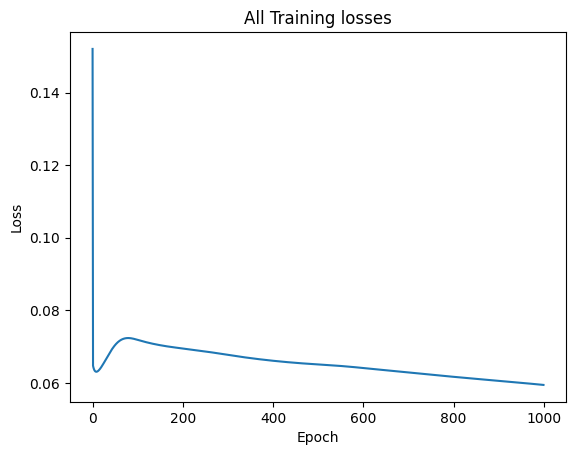

Test Accuracy: 0.943


In [ ]:
# initializing the neural network
input_size = x_train.shape[1]
hidden_size = 8
output_size = 1
nn = NeuralNetwork(input_size, hidden_size, output_size)

# train the neural network
nn.train(x_train, y_train, epochs = 1000)

# test the neural network
test_output = nn.forward(x_test)
test_prediction = (test_output > 0.5).astype(int)

# evaluate perfromance metrics
accuracy = accuracy_score(y_test, test_prediction)
print('Test Accuracy: {:.3f}'.format(accuracy))
